# Project intro

- CRIM     per capita crime rate by town
- ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS    proportion of non-retail business acres per town
- CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX      nitric oxides concentration (parts per 10 million)
- RM       average number of rooms per dwelling
- AGE      proportion of owner-occupied units built prior to 1940
- DIS      weighted distances to five Boston employment centres
- RAD      index of accessibility to radial highways
- TAX      full-value property-tax rate per \\$10,000   
- PTRATIO  pupil-teacher ratio by town
- B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT    % lower status of the population
- MEDV     Median value of owner-occupied homes in $1000's

# Pkgs

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# plt.rcParams['font.sans-serif'] = ['SimHei']  # 解决中文显示问题-设置字体为黑体
# plt.rcParams['axes.unicode_minus'] = False    # 解决保存图像是负号'-'显示为方块的问题
# sns.set(font='SimHei', font_scale=0.8)        # 解决Seaborn中文显示问题

# 机器学习部分
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 勿扰模式
import warnings                               
warnings.filterwarnings('ignore')

%matplotlib inline

# Load Data

In [9]:
url = "http://lib.stat.cmu.edu/datasets/boston"
boston_data = pd.read_csv(url, sep=r"\s+", skiprows=22, header=None)

data = np.hstack([boston_data.values[::2, :], boston_data.values[1::2, :2]])
target = boston_data.values[1::2, 2]

df = pd.DataFrame(data, columns=['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptration', 'b', 'lstat'])
df['Price'] = target

df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptration,b,lstat,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# Data Wrangling

In [10]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptration,b,lstat,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [16]:
df_clean = df.copy()

df_clean.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptration,b,lstat,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# EDA

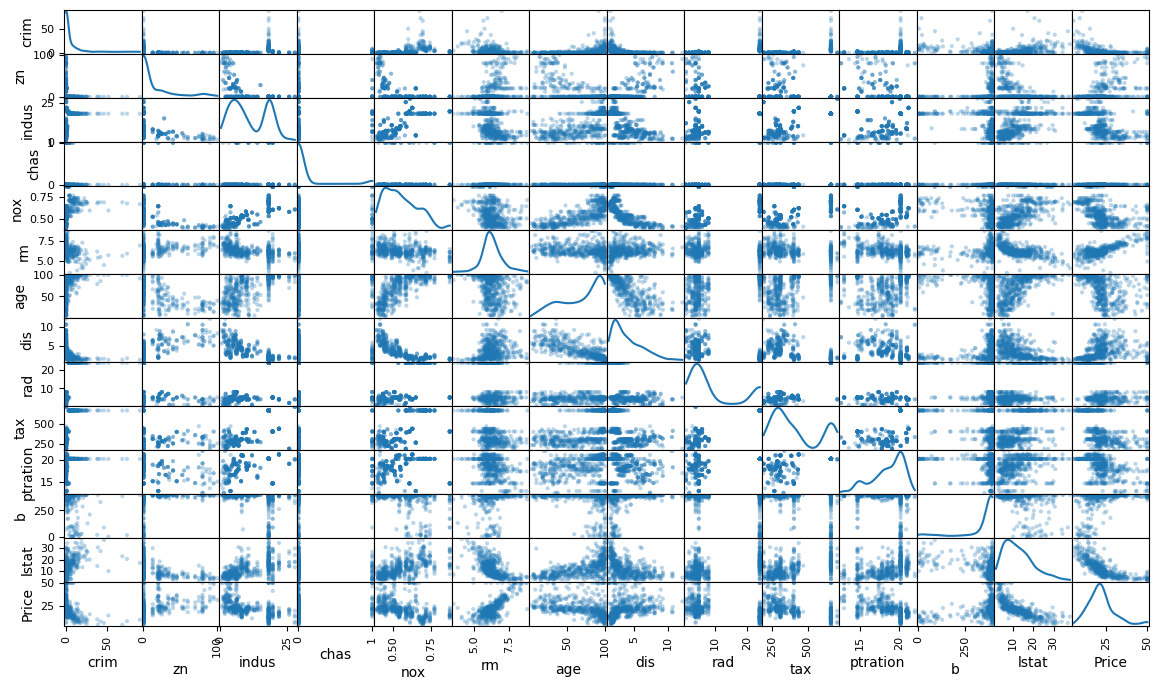

In [47]:
pd.plotting.scatter_matrix(df_clean, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

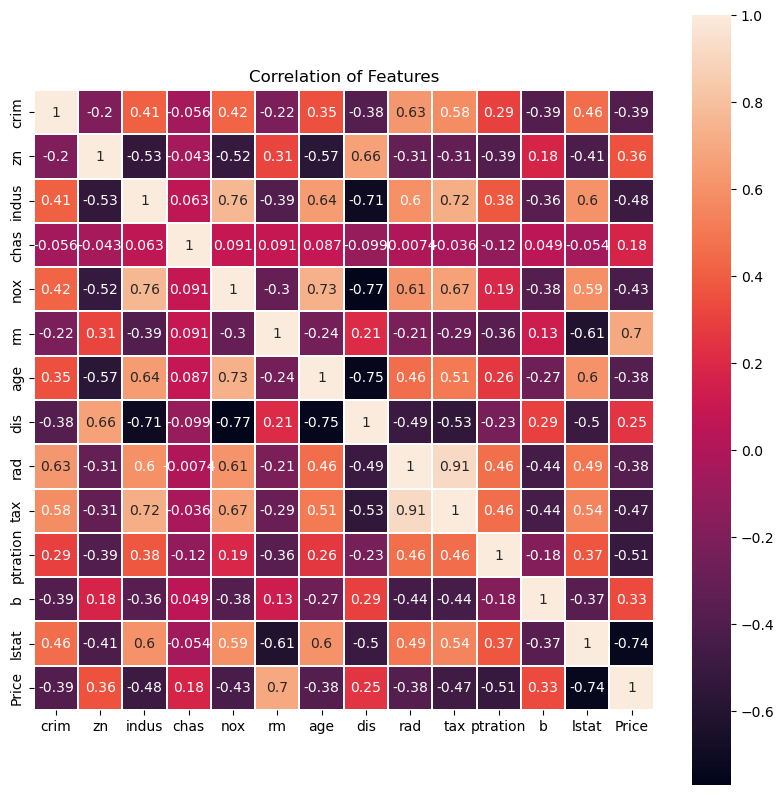

In [13]:
# 相关系数
plt.figure(figsize=(10,10))                         # 长宽相等的图更容易查看

plt.title('Correlation of Features')
sns.heatmap(
    df_clean.corr(),
    linewidths=0.1, 
    vmax=1.0,
    square=True,
    linecolor='white', 
    annot=True
);

# FE

In [17]:
X = np.array(df_clean['rm']).reshape(-1, 1)
y = np.array(df_clean['Price']).reshape(-1, 1)

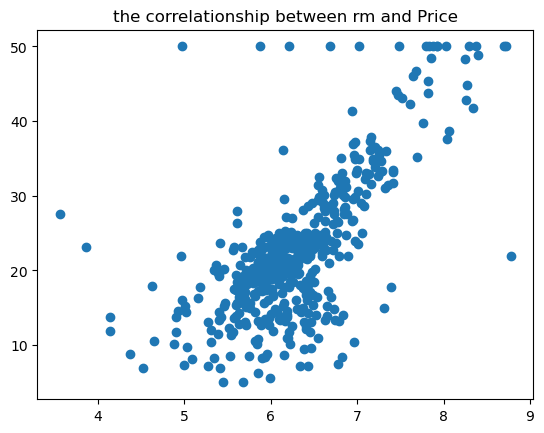

In [18]:
plt.scatter(X, y)
plt.title('the correlationship between rm and Price');

In [42]:
# outliers
# normalization
# data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1989)

# Modeling
## training

In [43]:
lr = LinearRegression()

# fit the model
lr.fit(X_train, y_train)

# predict
y_pred = lr.predict(X_test)

## Evaluation

In [44]:
# define a evaluation function
def linear_evaluation(y_test, y_pred):
    result = []
    result.append({
        'R2': r2_score(y_test, y_pred),
        'MSE': mean_squared_error(y_test, y_pred)
        })
    df_result = pd.DataFrame(result, columns=['R2', 'MSE'])
    return df_result

In [45]:
linear_evaluation(y_test, y_pred)

,R2,MSE
0,0.419203,54.154781


## model info

In [46]:
lr.coef_

array([0.       , 8.8924298])

## Visualization

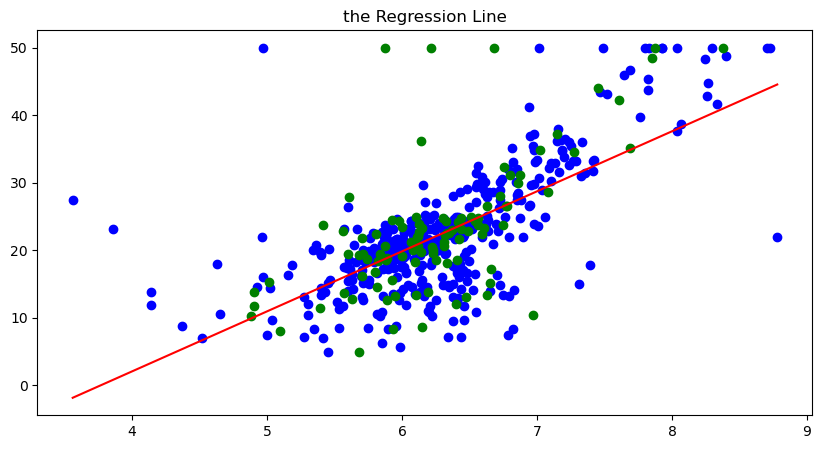

In [28]:
# the regression plot
X_prime = np.linspace(X.min(), X.max(), 100)
y_hat = lr.predict(X_prime.reshape(-1, 1))

plt.figure(figsize=(10,5)) 
# the scatter of X and y
plt.scatter(X_train, y_train, color='b')
plt.scatter(X_test, y_test, color='g')

# the regression line
plt.plot(X_prime, y_hat, color='r')

plt.title('the Regression Line');

# Output result

---
---

# Building Model with Statsmodels

In [29]:
import statsmodels.api as sm

In [30]:
X = df_clean['rm']
y = df_clean['Price']

## modeling

In [31]:
# adding a constant
X = sm.add_constant(X)

# use OLS object fit method to fit
est = sm.OLS(y, X)
model = est.fit()

# predict
y_hat = model.predict(X)

## display results

In [32]:
# display the results
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Wed, 31 Jan 2024   Prob (F-statistic):           2.49e-74
Time:                        13:26:07   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6706      2.650    -13.084      0.000     -39.877     -29.465
rm             9.1021      0.419     21.722      0.000       8.279       9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 结果解读
- Adj.R-squared: 俗称R方，反映模型的拟合水平，R方介于0到1，较高的R方值表示更好的拟合；
- const coef：截距
- std err：反映系数的准确度，越低，准确度越高；
- P > |t|：p值，p值小于0.05被认为是统计上显著的；
- Confidence Interval：置信区间，表示系数的可能范围（95%置信水平下）。

### 模型系数

In [37]:
# display the model params
pd.DataFrame(model.params, columns=['value'])       # pd.Series对象

,value
const,-34.670621
rm,9.102109


In [38]:
model.params['const']

-34.67062077643859

### visualization

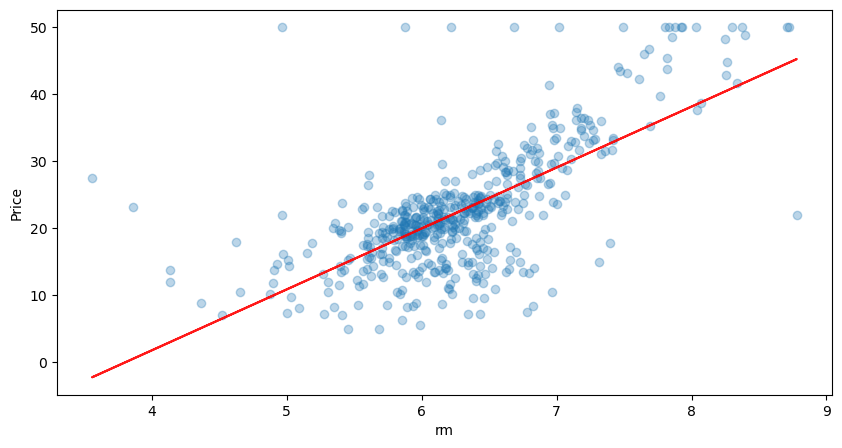

In [40]:
plt.figure(figsize=(10,5)) 

# plot
plt.scatter(X['rm'], y, alpha=0.3)            # the original data
plt.plot(X['rm'], y_hat, 'r', alpha=0.9)      # the regression line

plt.xlabel('rm')
plt.ylabel('Price');